# This Notebook is for sensor error plots : Old Sensor 2

Date 2023-06-12

Author: Jax

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc = {'figure.figsize':(18,10)})

In [2]:
df = pd.read_excel('dis.xlsx')
num = 'old 2'

In [3]:
df.head()

,Ground Truth,Laser,Maxbotix Mean,Std Deviantion,Variance,Error,Percentage Error,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,1100.0,1100.0,1102.46,0.500908,0.250909,2.46,0.223636,NaN,NaN,1102,...,2203,2304,2404,2505,2605,2705,2804,2902,2998,3098
1,1200.0,1200.0,1203.00,0.000000,0.000000,3.00,0.250000,NaN,NaN,1102,...,2203,2304,2404,2506,2605,2705,2804,2901,2998,3098
2,1300.0,1300.0,1303.52,0.502117,0.252121,3.52,0.270769,NaN,NaN,1102,...,2203,2303,2404,2506,2605,2705,2804,2901,2999,3099
3,1400.0,1400.0,1403.94,0.238683,0.056970,3.94,0.281429,NaN,NaN,1102,...,2203,2303,2404,2506,2605,2705,2804,2901,2999,3099
4,1500.0,1500.0,1504.00,0.000000,0.000000,4.00,0.266667,NaN,NaN,1102,...,2203,2302,2404,2506,2605,2705,2804,2902,2999,3099


## Individual histograms for each columns

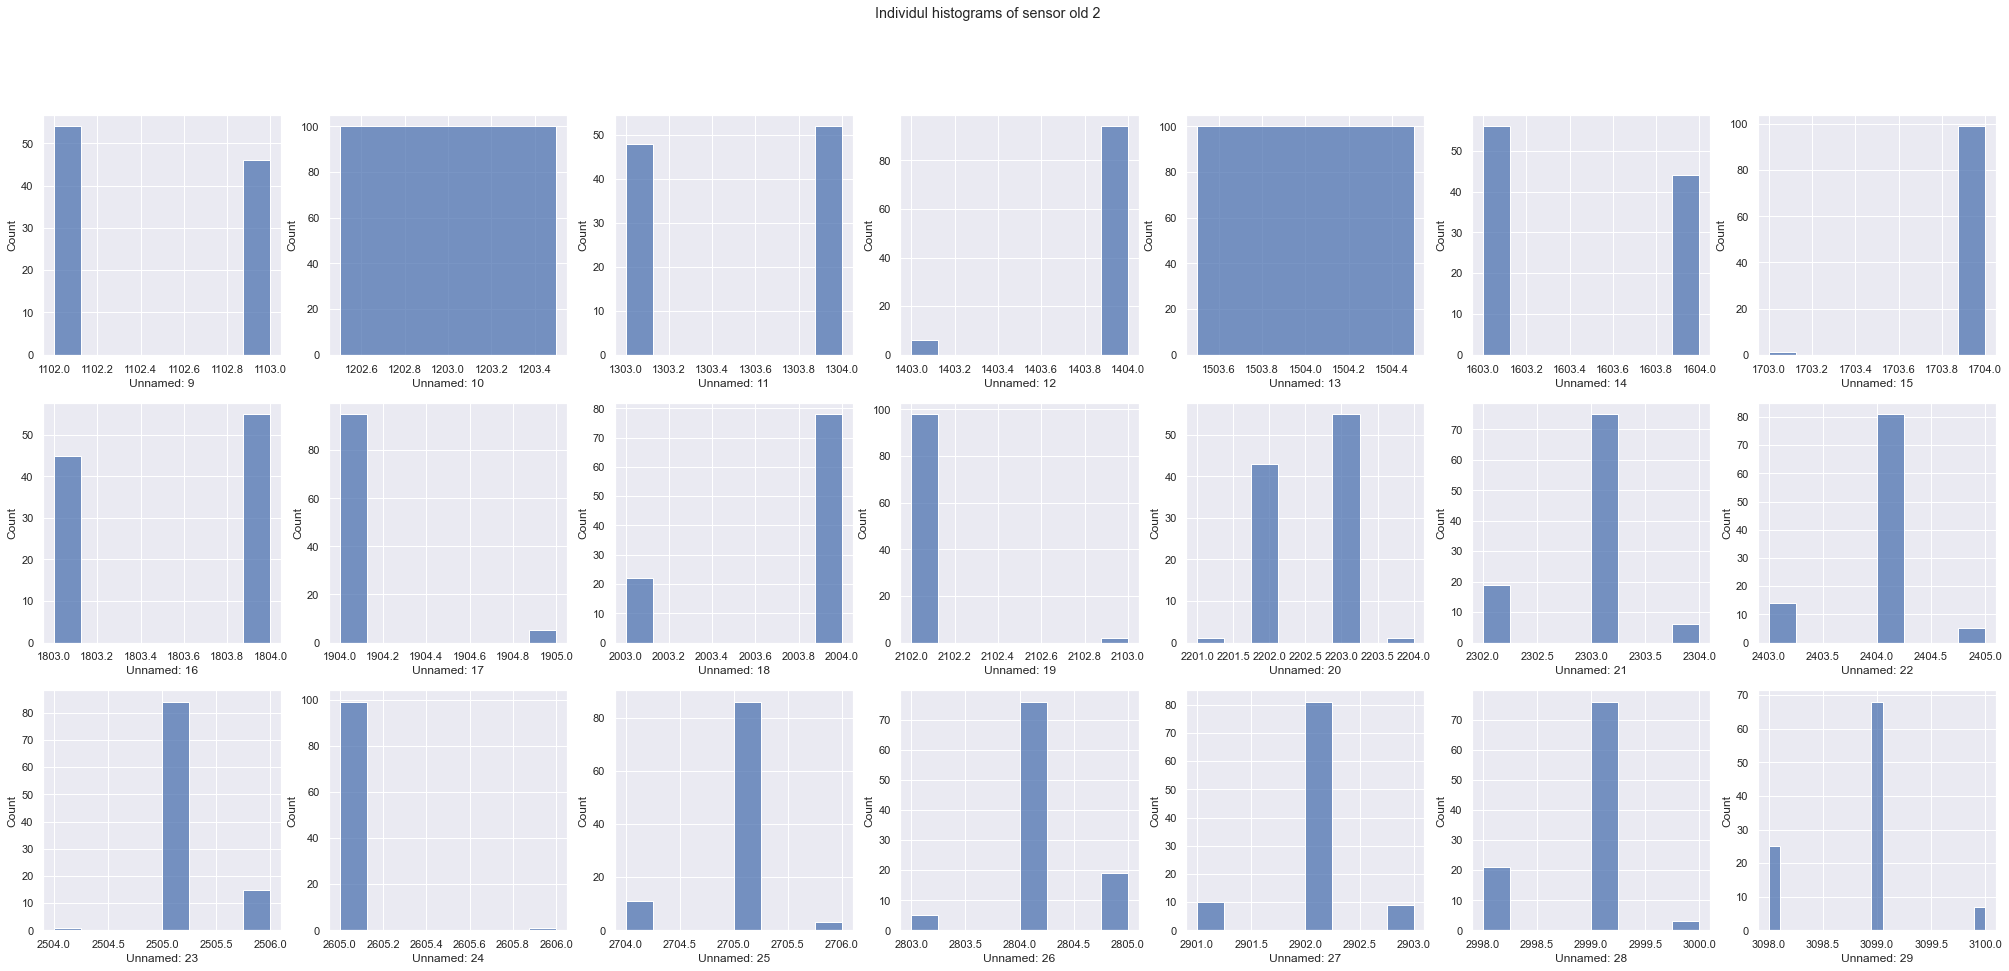

In [4]:
fig, axes = plt.subplots(3, 7, figsize=(35,15))
fig.suptitle(f'Individul histograms of sensor {num}')
for i in range(3):
    for j in range(7):
        x = 1100 + 100 * (i * 7 + j)
        sns.histplot(data=df, x="Unnamed: "+str(9 + i * 7 + j), ax = axes[i,j])
plt.savefig(f"histograms_sensor_{num}")

## Directly overlappting the columns

This visualization is not so clear and insightful so we do not use its plots

But is 'use' dataframe we generated at this step is important for making other graphs

### Overlapping First 10 cols

In [5]:
use = df.copy()
for i in range(21):
    x = 1100 + 100 * i
    use["Unnamed: "+str(9 + i)] = [j - x for j in use["Unnamed: "+str(9 + i)]] 
use.head()


,Ground Truth,Laser,Maxbotix Mean,Std Deviantion,Variance,Error,Percentage Error,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,1100.0,1100.0,1102.46,0.500908,0.250909,2.46,0.223636,NaN,NaN,2,...,3,4,4,5,5,5,4,2,-2,-2
1,1200.0,1200.0,1203.00,0.000000,0.000000,3.00,0.250000,NaN,NaN,2,...,3,4,4,6,5,5,4,1,-2,-2
2,1300.0,1300.0,1303.52,0.502117,0.252121,3.52,0.270769,NaN,NaN,2,...,3,3,4,6,5,5,4,1,-1,-1
3,1400.0,1400.0,1403.94,0.238683,0.056970,3.94,0.281429,NaN,NaN,2,...,3,3,4,6,5,5,4,1,-1,-1
4,1500.0,1500.0,1504.00,0.000000,0.000000,4.00,0.266667,NaN,NaN,2,...,3,2,4,6,5,5,4,2,-1,-1


In [6]:
# plt.clf()
# name_lis = []
# for i in range(10): 
#     name = "Unnamed: "+str(9 + i)
#     name_lis.append(1100 + 100 * i)
#     ax = sns.histplot(data=use, x=name, color= sns.color_palette("tab10")[i % 10], kde = True)
# ax.legend(name_lis)
# plt.savefig('first_part')


### Overlapping the rest

In [7]:
# plt.clf()
# name_lis = []
# for i in range(10,21): 
#     name = "Unnamed: "+str(9 + i)
#     name_lis.append(1100 + 100 * i)
#     ax = sns.histplot(data=use, x=name, color= sns.color_palette("tab10")[i % 10])
# ax.legend(name_lis)
# plt.savefig('second_part')


## Error v.s Std Devination

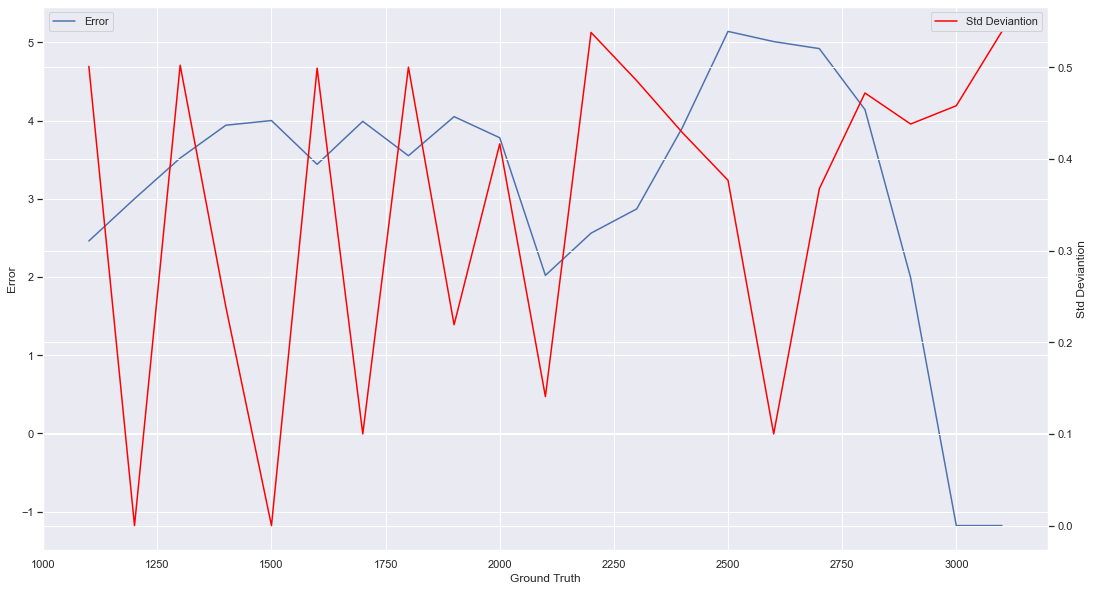

In [8]:
plt.clf()
ax1 = sns.lineplot(data = df, x = 'Ground Truth', y = 'Error')
ax2 = ax1.twinx()
sns.lineplot(data = df, x = 'Ground Truth', y = 'Std Deviantion', ax = ax2, color = 'Red')
ax1.legend(['Error'], loc="upper left")
ax2.legend(['Std Deviantion'], loc="upper right")
plt.savefig(f'error_stdiv_sensor_{num}')

## Error v.s precentage error

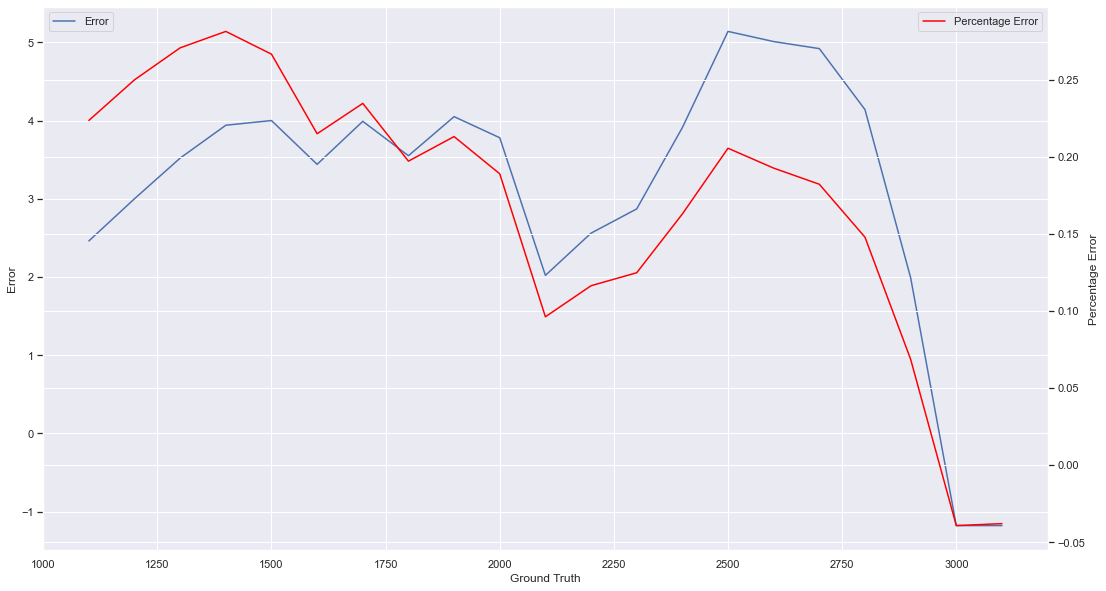

In [9]:
plt.clf()
ax1 = sns.lineplot(data = df, x = 'Ground Truth', y = 'Error')
ax2 = ax1.twinx()
sns.lineplot(data = df, x = 'Ground Truth', y = 'Percentage Error', ax = ax2, color = 'Red')
ax1.legend(['Error'], loc="upper left")
ax2.legend(['Percentage Error'], loc="upper right")
plt.savefig(f'error_precenterr_sensor_{num}')

## Precentage error v.s std devination

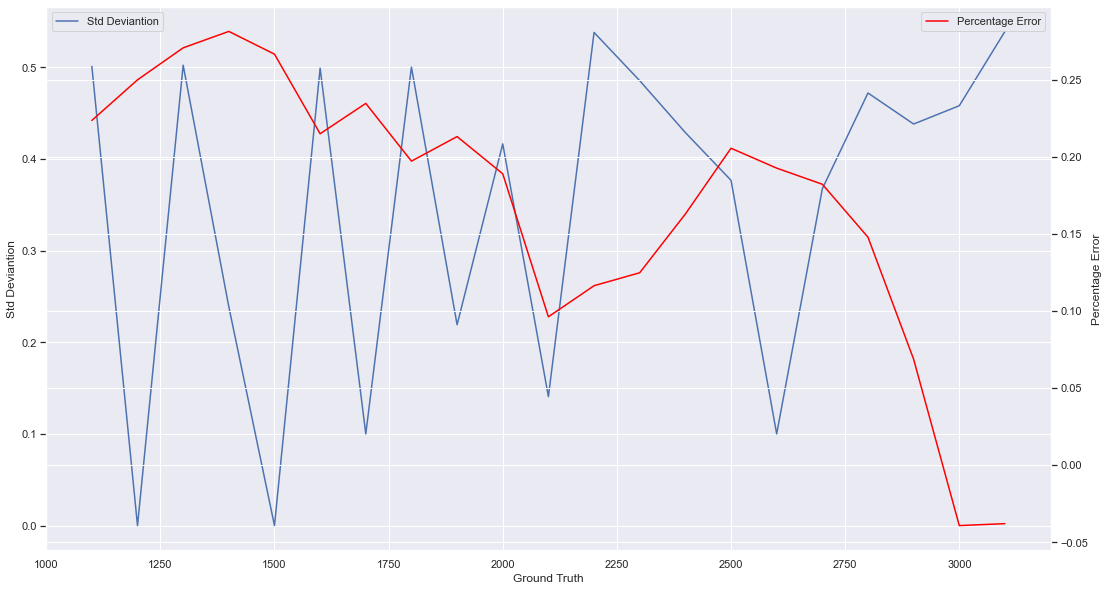

In [10]:
plt.clf()
ax1 = sns.lineplot(data = df, x = 'Ground Truth', y = 'Std Deviantion')
ax2 = ax1.twinx()
sns.lineplot(data = df, x = 'Ground Truth', y = 'Percentage Error', ax = ax2, color = 'Red')
ax1.legend(['Std Deviantion'], loc="upper left")
ax2.legend(['Percentage Error'], loc="upper right")
plt.savefig(f'precenterr_stdiv_sensor_{num}')

## Other ways to check error distribition

### heatmaps

In this visualization, we use heatmaps to show the distribution of errors among ground truth. 

The 'error' here are aligned to 2-digit level, that means for 1106, error is 6, for 1311, error is 11.

In [11]:
#use.head()

In [12]:
use2 = []
for i in range(21):
    x = 1100 + 100 * i
    for j in use["Unnamed: "+str(9 + i)]:
        dic = {'truth':x, 'error':j}
        use2.append(dic)
df2 = pd.DataFrame(use2)
df2.to_csv(f'/Users/lixingji/Desktop/NYU/Summer23/0609_corss_sensors/sensor_{num}.csv')
#df2

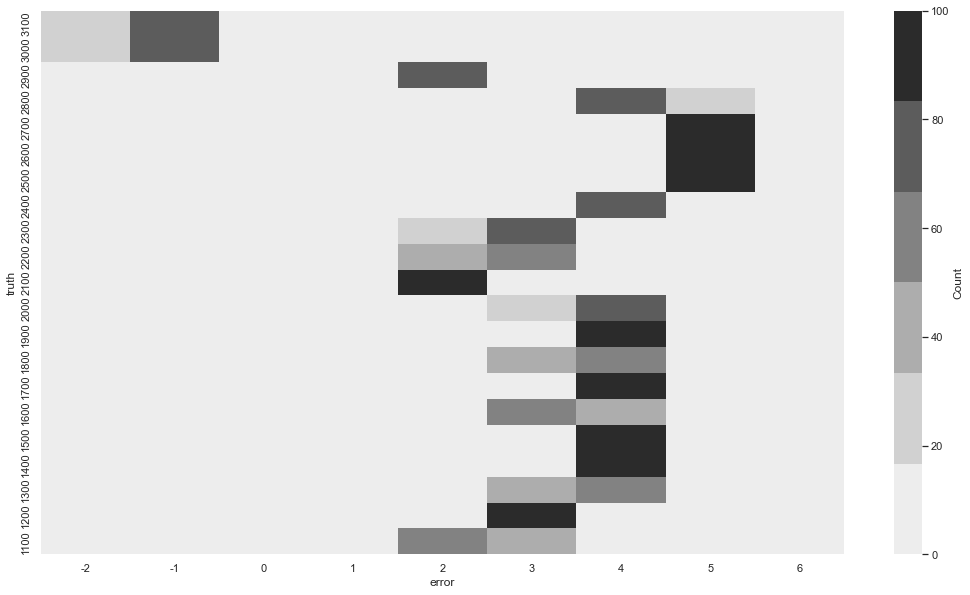

In [13]:
df = df2
years = range(df['truth'].min(), df['truth'].max() + 1)
cross = pd.crosstab(df['truth'], df['error'])

fig, ax = plt.subplots(figsize=(18,10))
sns.heatmap(cross, cbar_kws=dict(label='Count'), ax=ax,cmap=sns.color_palette("Greys"))
ax.invert_yaxis()
plt.savefig(f'heatmap1_sensor_{num}')


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


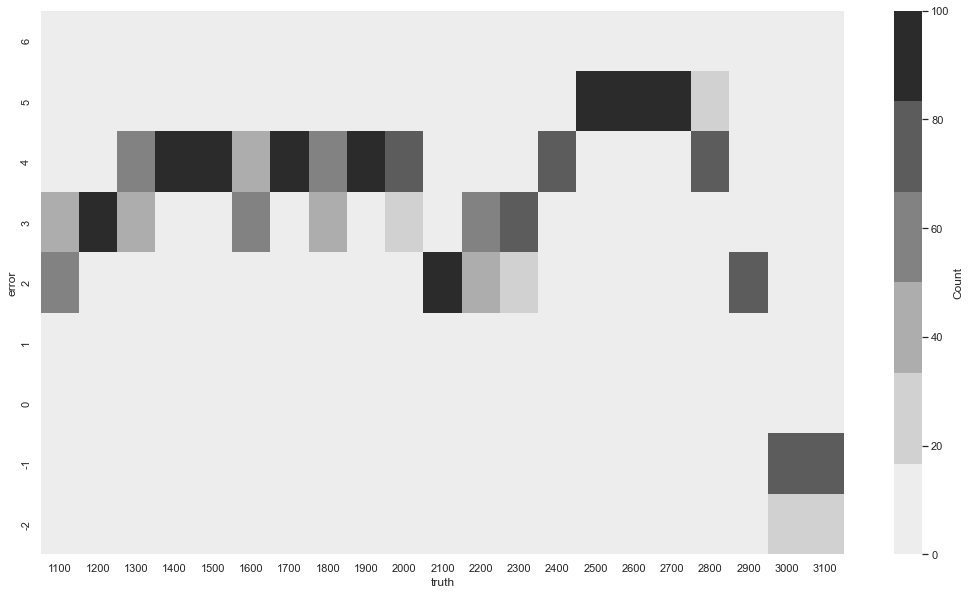

In [14]:
df = df2
years = range(int(df['error'].min()), int(df['error'].max()) + 1)
cross = pd.crosstab(df['error'], df['truth'])

fig, ax = plt.subplots(figsize=(18,10))
sns.heatmap(cross, cbar_kws=dict(label='Count'), ax=ax, cmap=sns.color_palette("Greys"))
ax.invert_yaxis()
sns.regplot(df['truth'],df['error'], scatter=False, ax =ax)
plt.savefig(f'heatmap2_sensor_{num}')

### Scatter plots with regression line

This plot basicly have the same representation of the heatmaps, where the bigger the point is means the more count it has. The good hand of this visualization is that we can simply plot the linear regression line.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


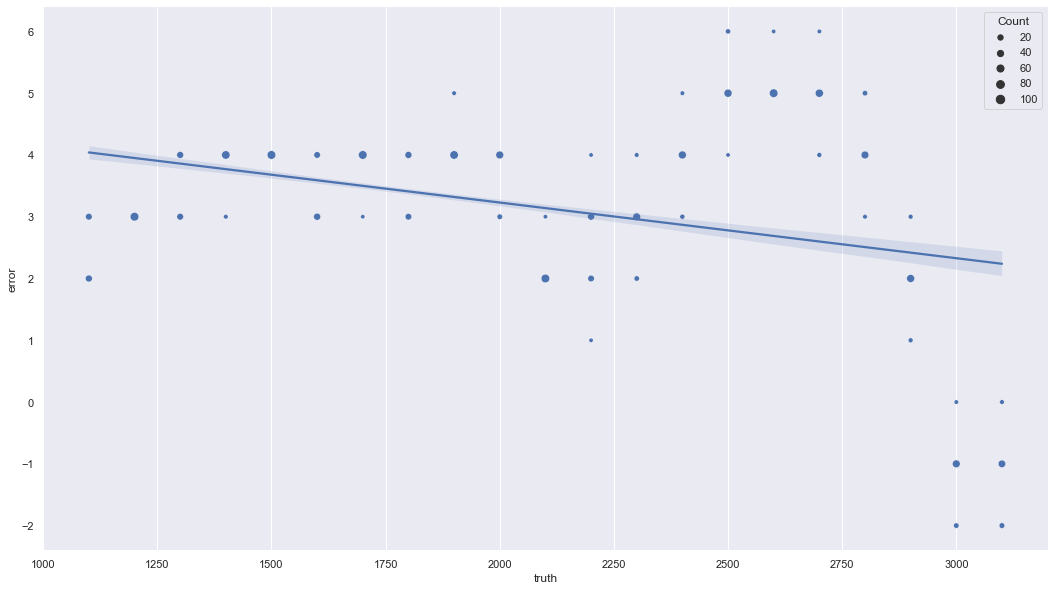

In [15]:
counts = df.groupby(['truth', 'error']).size().reset_index(name='Count')

fig, ax = plt.subplots(figsize=(18,10))
sns.scatterplot(data=counts, x='truth', y='error', size='Count', ax=ax)
ax.grid(axis='y')
sns.despine(left=True, bottom=True)
sns.regplot(df['truth'],df['error'], scatter=False)
plt.savefig(f'scatterplot_sensor_{num}')